In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [37]:
os.getcwd()

'C:\\Users\\Sudhe\\Downloads\\MRA Project'

In [38]:
# Load the dataset into a Pandas DataFrame
file_path = "Sales_Data.xlsx"
df = pd.read_excel(file_path)

In [39]:
# Display the first few rows of the DataFrame
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [40]:
# Display basic information about the dataset
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  

In [43]:
# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098951         6.491081   
std       91.877521         9.762135    42.042548         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES     ORDERDATE  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000   2747.000000           2747.000000  2747.000000  
mean    3553.047583  43598.914088           1757.085912   100.691664  
std     1838.953901    230.231295            819.280576    40.114802  
min      482.130000  43106.000000             42.000000    33.00

In [44]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [45]:
# Set up Seaborn style
sns.set(style="whitegrid")

C:\Users\Sudhe\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


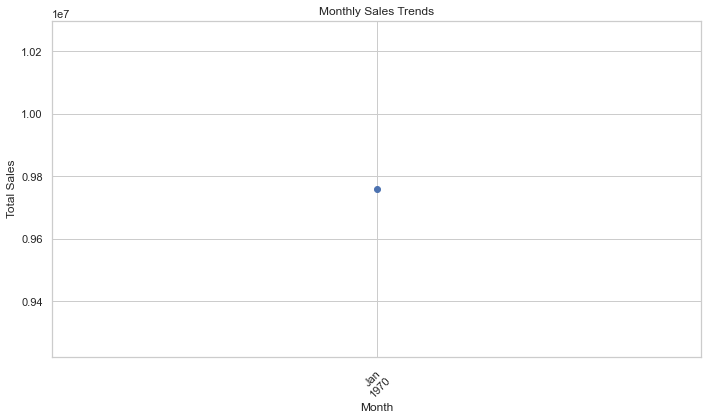

In [46]:
# Plot sales trends over time
plt.figure(figsize=(10, 6))
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])  # Convert ORDERDATE to datetime
df.groupby(df['ORDERDATE'].dt.to_period("M"))['SALES'].sum().plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

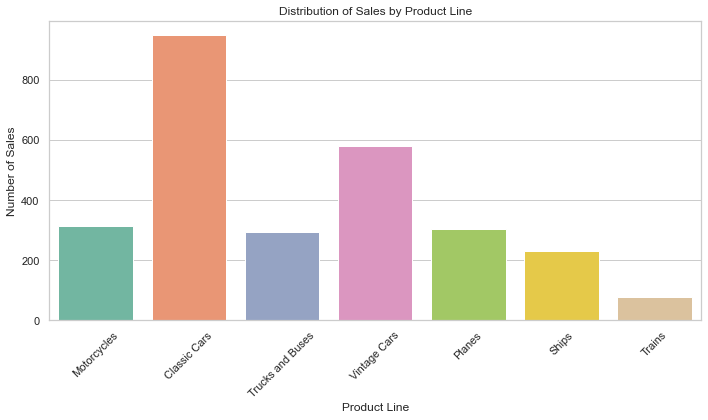

In [47]:
# Plot distribution of sales by product line
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PRODUCTLINE', palette='Set2')
plt.title('Distribution of Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

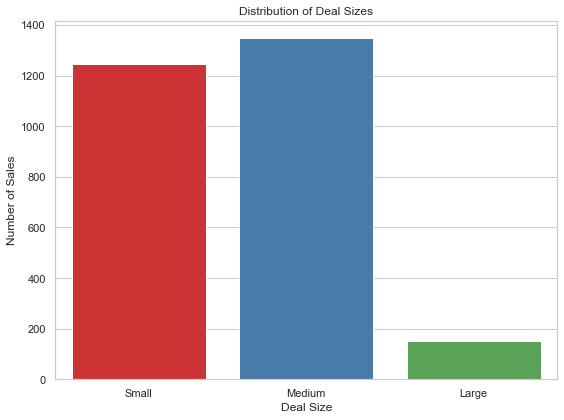

In [48]:
# Plot distribution of deal sizes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DEALSIZE', palette='Set1')
plt.title('Distribution of Deal Sizes')
plt.xlabel('Deal Size')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

In [49]:
# List of numerical columns for univariate analysis
numerical_columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

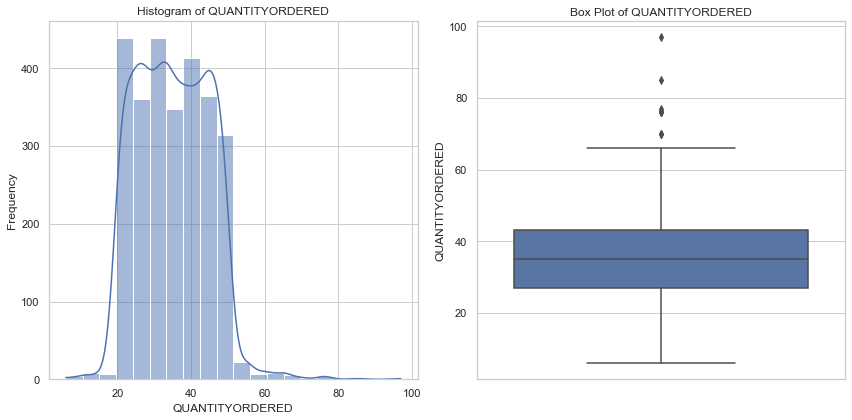

Summary Statistics of QUANTITYORDERED:
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64



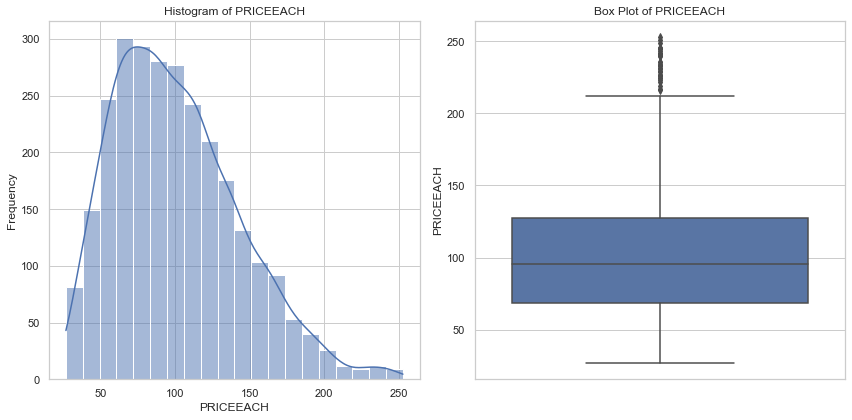

Summary Statistics of PRICEEACH:
count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64



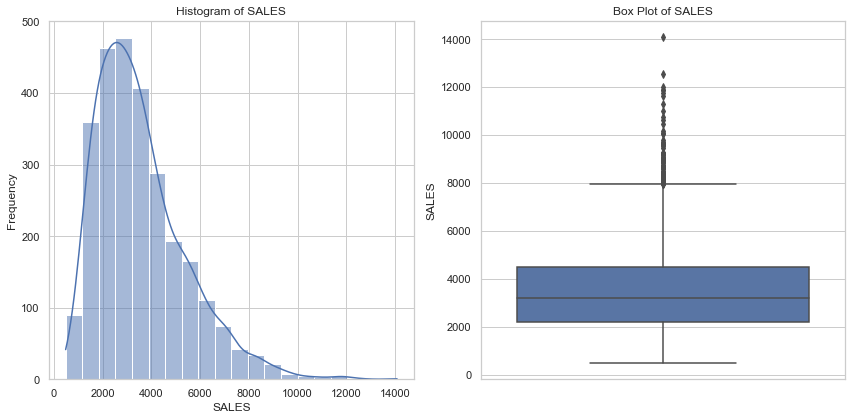

Summary Statistics of SALES:
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64



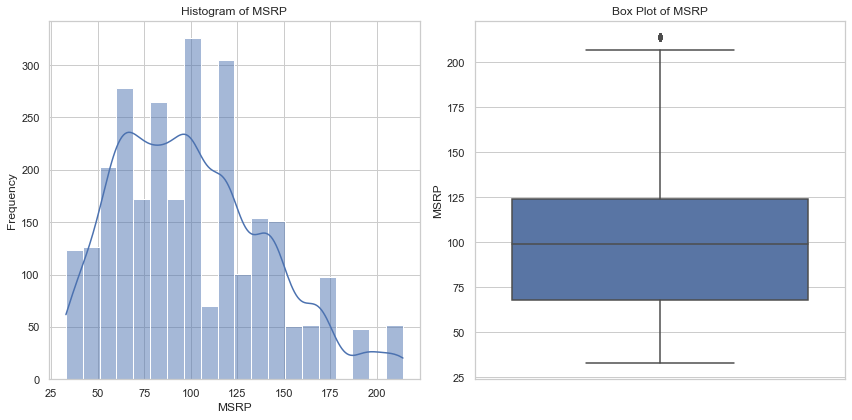

Summary Statistics of MSRP:
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64



In [50]:
# Loop through numerical columns for analysis
for column in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

    # Summary Statistics
    summary = df[column].describe()
    print(f"Summary Statistics of {column}:\n{summary}\n")

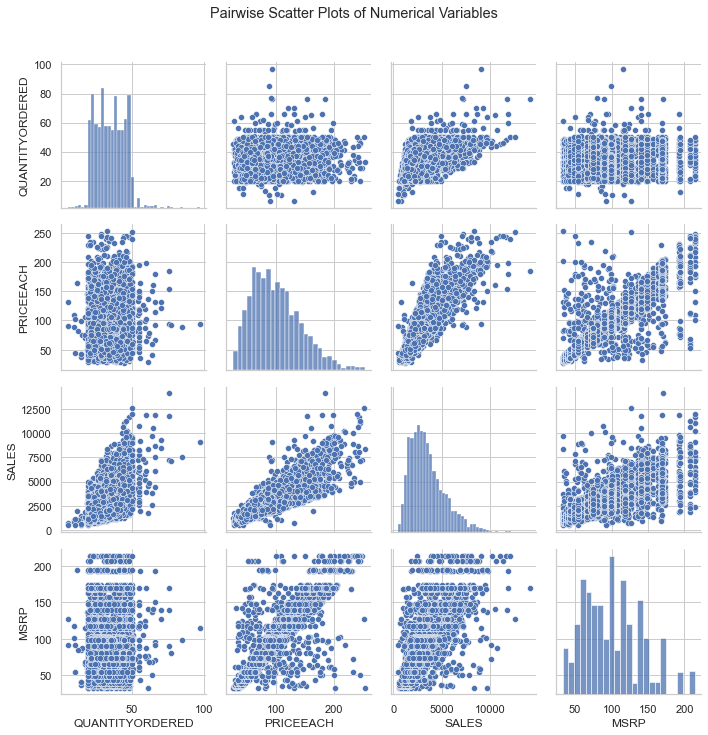

In [51]:
# Pairwise scatter plots for numerical variables
sns.pairplot(df, vars=['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP'], kind='scatter')
plt.suptitle('Pairwise Scatter Plots of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

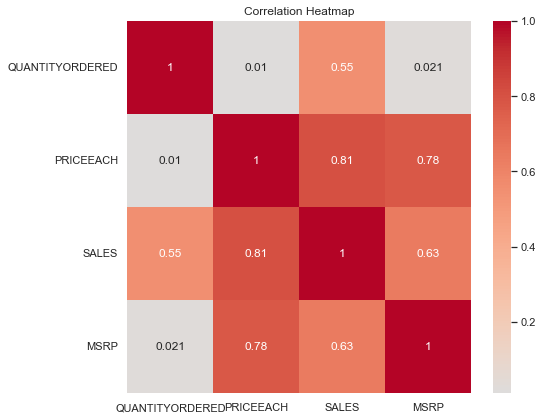

In [52]:
# Correlation Heatmap
correlation_matrix = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

C:\Users\Sudhe\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


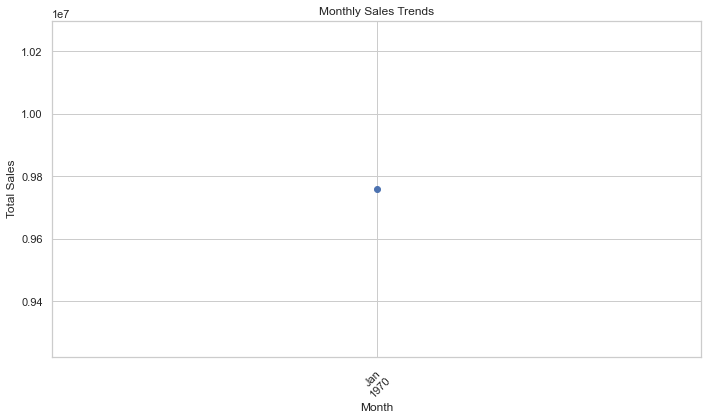

In [53]:
# Line plot to show sales trends over time
plt.figure(figsize=(10, 6))
df.resample('M', on='ORDERDATE')['SALES'].sum().plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

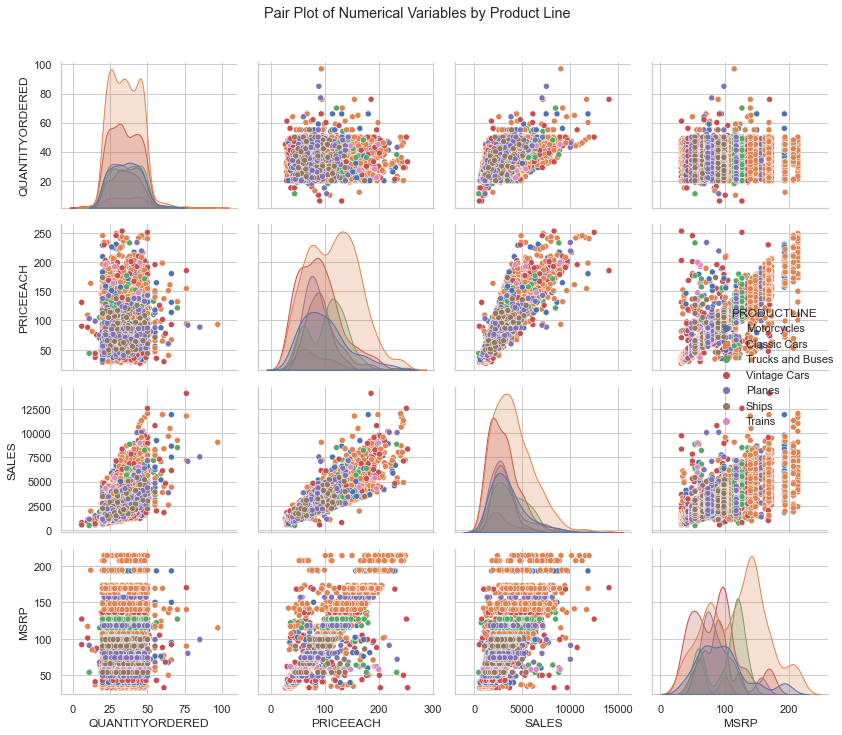

In [54]:
# Pair Plot for selected numerical variables
sns.pairplot(df, vars=['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP'], hue='PRODUCTLINE', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables by Product Line', y=1.02)
plt.tight_layout()
plt.show()

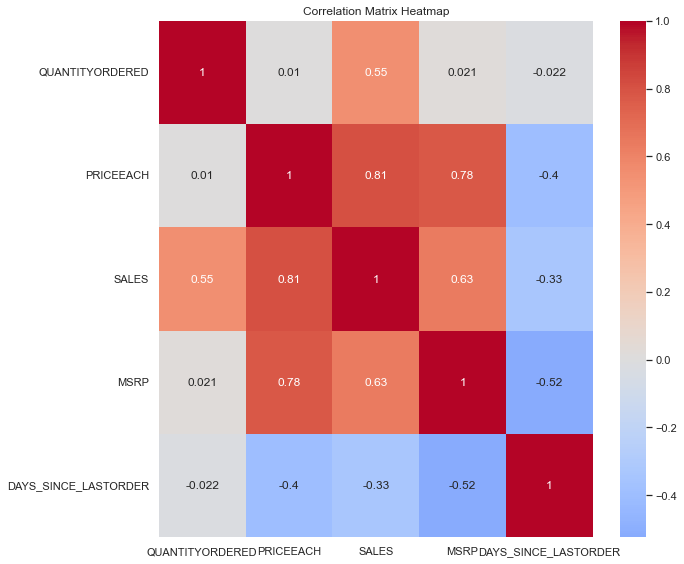

In [55]:
# Correlation Matrix Heatmap
correlation_matrix = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DAYS_SINCE_LASTORDER']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

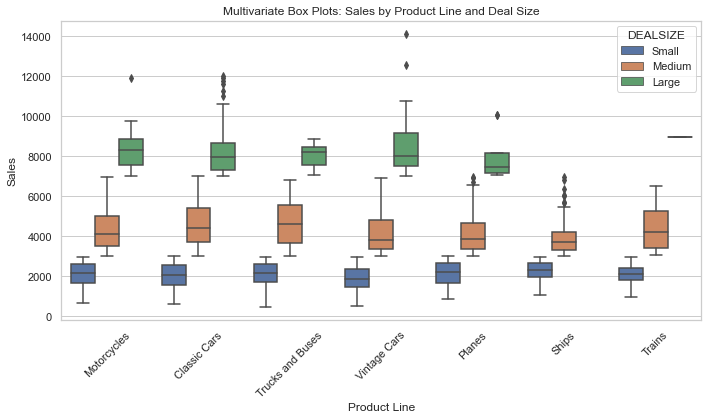

In [56]:
# Multivariate Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PRODUCTLINE', y='SALES', hue='DEALSIZE')
plt.title('Multivariate Box Plots: Sales by Product Line and Deal Size')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  \
ORDERNUMBER              1.000000         0.067110  -0.003369   
QUANTITYORDERED          0.067110         1.000000   0.010161   
PRICEEACH               -0.003369         0.010161   1.000000   
ORDERLINENUMBER         -0.054300        -0.016295  -0.052646   
SALES                    0.037289         0.553359   0.808287   
DAYS_SINCE_LASTORDER    -0.251476        -0.021923  -0.397092   
MSRP                    -0.013910         0.020551   0.778393   

                      ORDERLINENUMBER     SALES  DAYS_SINCE_LASTORDER  \
ORDERNUMBER                 -0.054300  0.037289             -0.251476   
QUANTITYORDERED             -0.016295  0.553359             -0.021923   
PRICEEACH                   -0.052646  0.808287             -0.397092   
ORDERLINENUMBER              1.000000 -0.057414              0.046615   
SALES                       -0.057414  1.000000             -0.334274   
DAYS_SINCE_LASTORDER         0.046615 -0.